# Fitting curves to data

In this notebook we look at doing something useful - fitting model 'crves' to real data.

We'll introduce  2 new modules that are often used for scientific computing: **scipy** and **pandas** - and we'll also be using numpy and matplotlib.

Scipy will give us a versataile curve fitting function, and pandas will introduce what are in effect useful extensions to the numpy 'array' structure along with a simple method to download data from the Internet.

Start off by importing modules



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sco
import pandas as pd


## Fitting a straight line

Next we'll import some data from the Web using a pandas function **read_csv()**. All pretty simple and self-explanitory - but notice that it takes the columns of data from a URL pointing to a CSV file, places them into an array with 'column' names taken from the file itself. 

NOTE: Normally we'd define all our functions here, but for the clarity of the demonstrationn we'll define functions later - as we need them
    

In [2]:
dat = pd.read_csv('http://greymamba.uk/Datasets/linear.csv')


Examine the first few lines of the data, extract the x and y values and then produce a quick and dirty plot.

Note that the data is identified by the column header names in the CSV file ('x' and 'y') and that the values are extracted from the panda array structure by using 'values'.


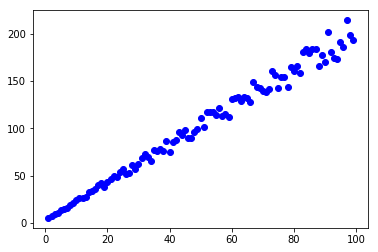

In [3]:

x = dat['x'].values
y = dat['y'].values
plt.plot(x,y,'bo')



Well that looks pretty linear so let's plot a straight line.

First we need to define a function that will return straight line data given the essential parameters (usually we'd do this at the start of the program). Remember a straight line is defined as y=mx+c where 'm' is the gradient and 'c' the y axis intercept. so we need to pass in the x values, m and c. So...


In [4]:
def stLineFit(x, m, c):
    return (m*x + c)


Now we'll use the scipy **curve_fit** function to 'fit' our straight line function to our data. **curve_fit needs you to pass in the x and y values of your data, the name of the function to fit and a list of starting values for the fitting function parameters - in our case m and c, and these look to be around 2 and 5 say.

The curve_fit function returns 2 things - a list/array of the optimised function parameters (we'll call this 'popt') and a 2D array containing statitical information about the fit ('pcov', which we don't use here).



In [5]:
p0 =[2,5]
popt,pcov = sco.curve_fit(stLineFit,x,y,p0)


So, all we need to do now is to print out the optimised parameters and the fitted line!

Things to note. 1) We use our function to get the computed 'y' values. 2) we pass all 2 parameter values contained in popt by 'unpacking' them using ***popt**. We could just as well have used **stLineFit(x,popt[0], popt[1]**

We can also get the one standard deviation errors on the parameters by using **perr=np.sqrt(np.diag(pcov))**


Optimised parameters are: [1.98297717 4.11077798]
SD of parameters are: [0.02293241 1.32068903]


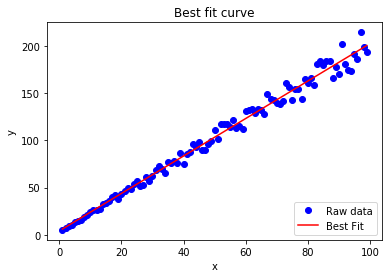

In [6]:
print('Optimised parameters are:', popt)
perr=np.sqrt(np.diag(pcov))
print('SD of parameters are:', perr)

plt.title('Best fit curve')
plt.ylabel('y')
plt.xlabel('x')
plt.plot(x, y, 'bo', label='Raw data')
plt.plot(x, stLineFit(x,*popt), label='Best Fit', color='red')
plt.legend(loc='lower right')


## Heart Rate data - a more complex example

Here is another example using heart rate data and a more complex model.

Create a model:


In [7]:
# Define a curve function that we'll be fitting to the data
# Theory indicates it should be of the form C0 +C1t-C2e^(-C3t), where
# C0,C1,C2,C3 are constants and t is time.
def bpm(t,C0,C1,C2,C3):
    return C0+C1*t-C2*np.exp(-C3*t)


Read in the data and form 'x' and 'y' values


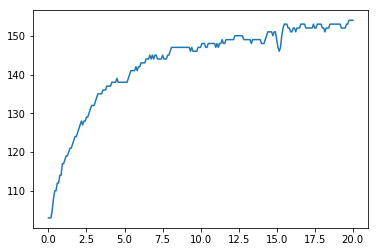

In [8]:
# Get some hear rate data from the Web.
# This URL has some data we can use - with columns called: 'Time(sec') and 'Heart Rate (BPM)'
url = 'http://apmonitor.com/che263/uploads/Main/heart_rate.txt'
# This time we'll use a new module called 'pandas' which has an even more 
# flexible/useful 'array' data structure than numpy
heart_data = pd.read_csv(url)

# Abstract the  X and Y values
t = heart_data['Time (sec)'].values
hr = heart_data['Heart Rate (BPM)'].values

# Have a quick and dirty look at it
plt.plot(t/60.0,hr)
plt.show()



Do the fitting and plot it out


Optimised parameters are: 142.37319656688075 0.00924806135665063 40.02920409556522 0.006840291317054435


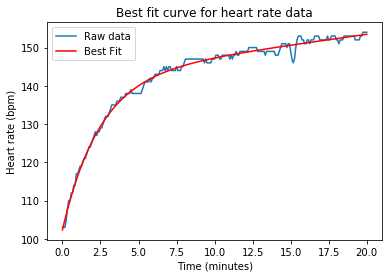

In [9]:
# 'Guess' some initial parameters for the constants
p0 = [100,0.01,100,0.01]

# and fit the curve 
p,pcov = sco.curve_fit(bpm,t,hr,p0)
print('Optimised parameters are:', *p)

# Now plot it out
plt.title('Best fit curve for heart rate data')
plt.ylabel('Heart rate (bpm)')
plt.xlabel('Time (minutes)')
plt.plot(t/60.0, hr, label='Raw data')
plt.plot(t/60.0, bpm(t,*p), label='Best Fit', color='red')
plt.legend(loc='best')

plt.show()


## Indentifying multiple spectrum data peaks

Finally a slightly more complex coding example. We'll use some Compton data and fit some Gaussians to it as a way of 'accurately' finding the peak positions. It requires some user input and uses loops and lists.

Define the Gaussian function, read in the data and plot it roughly.


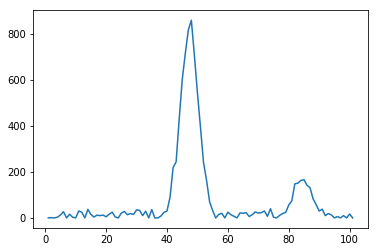

In [10]:
def gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

spectral_data = pd.read_csv('http://greymamba.uk/Datasets/comptonPeaks.csv')

X = spectral_data['Channels'].values
Y = spectral_data['Intensity'].values

plt.plot(X, Y)
plt.show()


Next ask the user to give some rough estimates of the position and 'width' of the peak positions to be fitted. At this stage we don't know how many peaks will be fitted so we ask the user and store the answer in the **peakNo** variable. We'll also need to store a variable number of position and width values in something. To do this we set up an empty list called **peaks** and one called **halfWidths** and we'll append values as we go along.

Repeat (or loop through) the same bit of code 'peakNo' times using the construct **for i in range(peakNo):** asking for etimated peak position and FWHM values for each peak. Notice that the input function returns a $string$ so we have to 'cast' it to an integer (in this case) using **int()**. 

**NOTE** there are many things that could go wrong here - for example we could enter a negative number or a letter. In a really good bit of code we'd need to 'catch' these problems rather than let the program crash - but this is just a simple example - so we'll assume perfect input.


In [12]:
# Get some estimated features of these peaks
peakNo = int(input("How many peaks? ")) 
peaks=[]
halfWidths = []
for i in range(peakNo):
    print("For peak number ",i+1)
    peaks.append(int(input ("Approximate peak channel number: ")))
    halfWidths.append(int(input ("Approximate FWHM: ")))

How many peaks? 2
For peak number  1
Approximate peak channel number: 45
Approximate FWHM: 10
For peak number  2
Approximate peak channel number: 85
Approximate FWHM: 10



Finally get a fit for each peak and plot it all out.


Peak 1 is at Channel 47.4
Peak 2 is at Channel 84.5


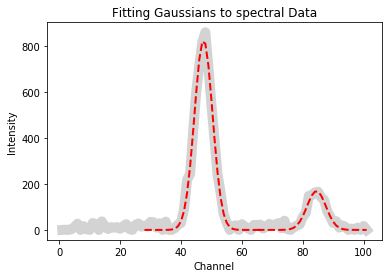

In [13]:
# Now fit Gaussians to each of the peaks
# In turn, supply the scipy 'curve-fit' function with a Gaussian generator function, 
# a subset of the spectrum around the estimated peak and a set of rough guess parameters
poptlist=[]
for i in range(peakNo):
    # Use a X,Y subset around the estimated peak position
    Xsub=X[peaks[i]-2*halfWidths[i]:peaks[i]+2*halfWidths[i]]
    Ysub=Y[peaks[i]-2*halfWidths[i]:peaks[i]+2*halfWidths[i]]
    popt2, pcov = sco.curve_fit(gauss,Xsub,Ysub,p0=[200,peaks[i],halfWidths[i]/2])
    poptlist.append(popt2)
    
# Plot the actual data
plt.plot(X,Y, label='Data', color='lightgrey', linewidth=10)
# Now each of the fitted Gaussians
for i in range(peakNo):
    Xsub=X[int(poptlist[i][1])-2*halfWidths[i]:int(poptlist[i][1])+2*halfWidths[i]]
    Ysub=Y[int(poptlist[i][1])-2*halfWidths[i]:int(poptlist[i][1])+2*halfWidths[i]]
    plt.plot(Xsub, gauss(Xsub, *poptlist[i]), color='red', linestyle='dashed', linewidth=2)
plt.title('Fitting Gaussians to spectral Data')
plt.xlabel('Channel')
plt.ylabel('Intensity')

# Print out the Gaussian peak position. Note the formating of the output '{:.1f}.format() wil produce a single decimal place'
for i in range(peakNo):
    print('Peak', i+1, 'is at Channel '+"{:.1f}".format(poptlist[i][1]))